In [6]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from pandas import read_csv as read

path = "filtData.csv"
data = read(path, delimiter=",", usecols=['amount', 'isFraud'])

X = data.values

sum_no_fraud = 0
sum_fraud = 0

cnt_no_fraud = 0
cnt_fraud = 0

fr = []
n_fr = []

for x in X:
    if x[1] == 1:
        cnt_fraud += 1
        sum_fraud += x[0]
        fr.append(x[0])
    else:
        cnt_no_fraud += 1
        sum_no_fraud += x[0]
        n_fr.append(x[0])

print("Avg no fraud: ", sum_no_fraud / cnt_no_fraud)
print("Avg fraud: ", sum_fraud / cnt_fraud)

Avg no fraud:  178197.04172739814
Avg fraud:  1467967.299140387


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E44D690>]],
      dtype=object)

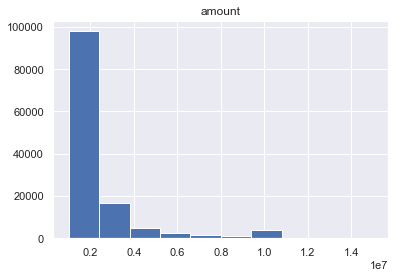

In [7]:
data.hist('amount', range=[1000000, 15000000])

In [8]:
cnt_fraud

8213

In [9]:
cnt_no_fraud


6354407

In [10]:
cnt_fraud + cnt_no_fraud

6362620

In [39]:
path = "frauds.csv"
data = read(path, delimiter=",")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [48]:
(data.type == 'TRANSFER').sum()

4097

In [43]:
(data.type == 'CASH_IN').sum()

0

In [44]:
(data.type == 'CASH_OUT').sum()

4116

In [45]:
(data.type == 'PAYMENT').sum()

0

In [46]:
(data.type == 'DEBIT').sum()

0

In [52]:
path = "newFilt.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)

data['div'] = data.amount / data.oldbalanceOrg

data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,div
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.0,0,1,1,1,1,0,0,0,0,0.057834
1,1,TRANSFER,181.00,181.00,0.00,0.0,0.0,1,1,1,1,0,0,0,0,1,1.000000
2,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.0,1,1,1,1,0,0,0,0,1,1.000000
3,1,PAYMENT,9478.39,116494.00,107015.61,0.0,0.0,0,1,1,1,1,0,0,0,0,0.081364
4,1,PAYMENT,3454.08,9031.96,5577.88,0.0,0.0,0,1,1,1,1,0,0,0,0,0.382429
